In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# Load and preprocess
df = pd.read_csv("../notebook/data/startup data.csv")
df = df[df['status'].isin(['closed', 'acquired'])]
df['Bankruptcy'] = df['status'].apply(lambda x: 1 if x == 'closed' else 0)

drop_cols = ['status', 'name', 'founded_at', 'closed_at', 'first_funding_at',
             'last_funding_at', 'Unnamed: 0', 'id', 'object_id', 'zip_code',
             'latitude', 'longitude']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

X = df.drop('Bankruptcy', axis=1)
y = df['Bankruptcy']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Naive Bayes": GaussianNB()
}

model_scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    model_scores[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0)
    }

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [3]:
# Display results
results_df = pd.DataFrame(model_scores).T.round(3)
print(results_df)

                     Accuracy  Precision  Recall  F1-Score
Logistic Regression     0.985       1.00   0.958     0.979
Decision Tree           1.000       1.00   1.000     1.000
Random Forest           0.824       1.00   0.500     0.667
KNN                     0.647       0.50   0.125     0.200
SVM                     0.765       0.90   0.375     0.529
Gradient Boosting       1.000       1.00   1.000     1.000
XGBoost                 1.000       1.00   1.000     1.000
Naive Bayes             0.897       0.87   0.833     0.851


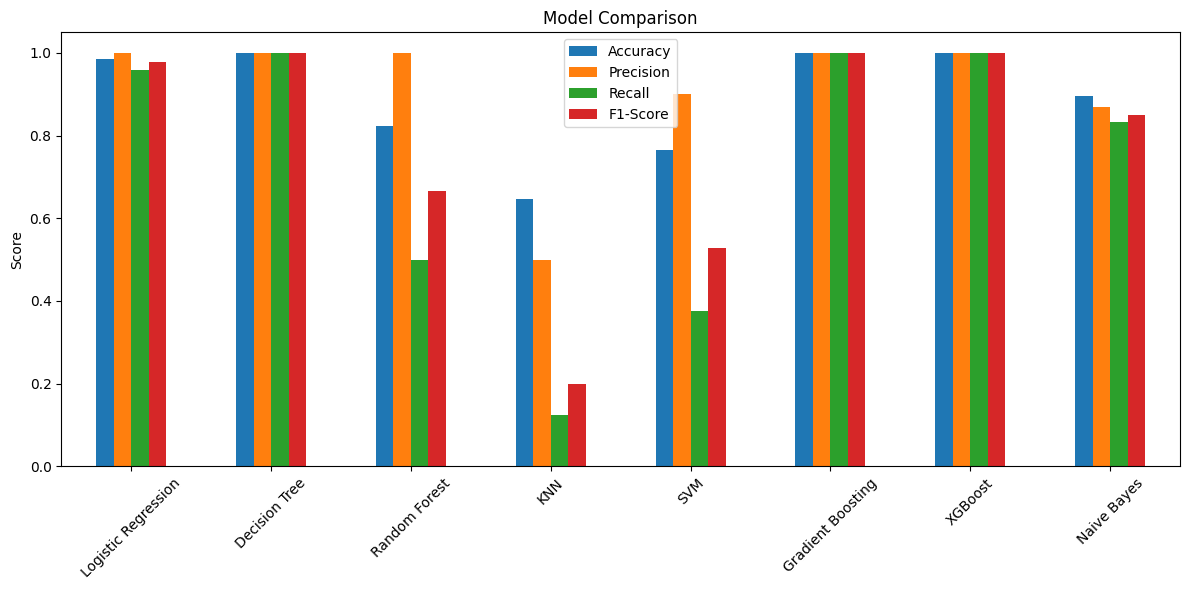

In [4]:
# Plot
results_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

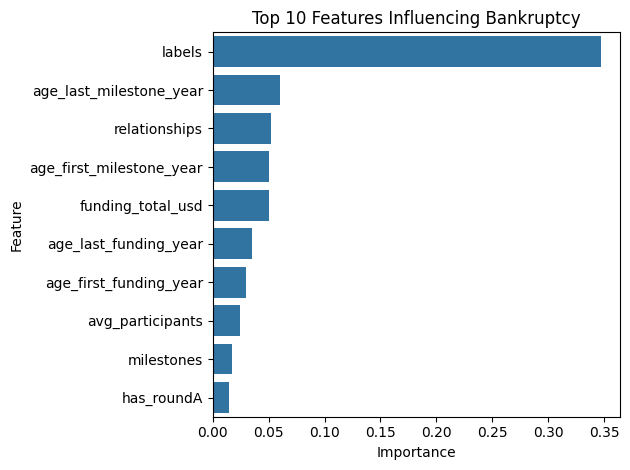

In [5]:
# Feature Importance (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
importances = model.feature_importances_
features = X.columns
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature')
plt.title("Top 10 Features Influencing Bankruptcy")
plt.tight_layout()
plt.show()